In [ ]:
import pandas as pd
import tensorflow as tf
from sklearn.metrics import confusion_matrix
# from sklearn.cross_validation import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score
from sklearn.metrics import auc
from matplotlib import pyplot

In [ ]:
!pip install 

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
dataset = pd.read_csv('/content/gdrive/MyDrive/full_data_correction3fix.csv')
X = dataset.iloc[:, 1:-1].values
y = dataset.iloc[:, -1].values

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 100)

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)
# X_test = sc.transform(X_test)


In [ ]:
from joblib import dump, load
dump(sc, 'scaler.joblib') 

['scaler.joblib']

In [ ]:
print(X)

[[ 1.3229278  -0.08238428 -0.05930746 ... -0.80632177 -0.34538723
  -0.44637344]
 [-0.08072012 -0.27902312 -0.05357506 ... -0.80632177 -0.11506259
   0.11671417]
 [-0.09584577 -0.21743281 -0.06786909 ... -0.80632177 -0.07962804
  -0.2757783 ]
 ...
 [-0.1193599  -0.2788185  -0.06832205 ... -0.80632177 -0.38082178
  -0.46917082]
 [-0.11855077 -0.2227529  -0.06830507 ...  1.24019968 -0.20364899
   0.09737803]
 [-0.11931036 -0.27595383 -0.06831229 ... -0.80632177 -0.38082178
  -0.46917082]]


In [ ]:
ann = tf.keras.models.Sequential()
ann.add(tf.keras.layers.Dense(units=65, activation='relu'))
ann.add(tf.keras.layers.Dense(units=30, activation='relu'))

ann.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))
ann.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [ ]:
ann.fit(X, y, batch_size = 32, epochs = 30)

Epoch 1/30
34/34 [==============================] - 1s 2ms/step - loss: 0.6590 - accuracy: 0.5854
Epoch 2/30
34/34 [==============================] - 0s 1ms/step - loss: 0.5774 - accuracy: 0.6979
Epoch 3/30
34/34 [==============================] - 0s 1ms/step - loss: 0.5413 - accuracy: 0.7261
Epoch 4/30
34/34 [==============================] - 0s 1ms/step - loss: 0.5164 - accuracy: 0.7402
Epoch 5/30
34/34 [==============================] - 0s 2ms/step - loss: 0.4949 - accuracy: 0.7589
Epoch 6/30
34/34 [==============================] - 0s 1ms/step - loss: 0.4798 - accuracy: 0.7777
Epoch 7/30
34/34 [==============================] - 0s 1ms/step - loss: 0.4648 - accuracy: 0.7889
Epoch 8/30
34/34 [==============================] - 0s 1ms/step - loss: 0.4589 - accuracy: 0.7805
Epoch 9/30
34/34 [==============================] - 0s 1ms/step - loss: 0.4419 - accuracy: 0.8021
Epoch 10/30
34/34 [==============================] - 0s 1ms/step - loss: 0.4347 - accuracy: 0.8021
Epoch 11/30
34/34 [

[[137   2]
 [ 68   7]]
              precision    recall  f1-score   support

         0.0       0.67      0.99      0.80       139
         1.0       0.78      0.09      0.17        75

    accuracy                           0.67       214
   macro avg       0.72      0.54      0.48       214
weighted avg       0.71      0.67      0.58       214

Logistic: f1=0.167 auc=0.603


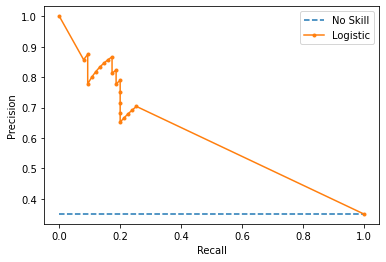

In [ ]:
# X = sc.fit_transform(X)
y_pred = ann.predict(X_test)
lr_probs = y_pred
y_pred = (y_pred > 0.5)
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
print(classification_report(y_test,y_pred))
accuracy_score(y_test, y_pred)



lr_precision, lr_recall, _ = precision_recall_curve(y_test, lr_probs)
lr_f1, lr_auc = f1_score(y_test, y_pred), auc(lr_recall, lr_precision)
# summarize scores
print('Logistic: f1=%.3f auc=%.3f' % (lr_f1, lr_auc))
# plot the precision-recall curves
no_skill = len(y_test[y_test==1]) / len(y_test)
pyplot.plot([0, 1], [no_skill, no_skill], linestyle='--', label='No Skill')
pyplot.plot(lr_recall, lr_precision, marker='.', label='Logistic')
# axis labels
pyplot.xlabel('Recall')
pyplot.ylabel('Precision')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

In [ ]:
user = fetch_user_details(follower.screen_name)
x1 = ann.predict(sc.transform([user]))

NameError: ignored

In [ ]:
ann.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                multiple                  4290      
_________________________________________________________________
dense_1 (Dense)              multiple                  1320      
_________________________________________________________________
dense_2 (Dense)              multiple                  21        
Total params: 5,631
Trainable params: 5,631
Non-trainable params: 0
_________________________________________________________________


In [ ]:
ann.save('/content/gdrive/MyDrive/final_model.h5')

In [ ]:
#########
##### decision tree



def train_using_gini(X_train, X_test, y_train):
  
    # Creating the classifier object
    clf_gini = DecisionTreeClassifier(criterion = "gini",
            random_state = 100,max_depth=3, min_samples_leaf=5)
  
    # Performing training
    clf_gini.fit(X_train, y_train)
    return clf_gini
      
# Function to perform training with entropy.
def tarin_using_entropy(X_train, X_test, y_train):
  
    # Decision tree with entropy
    clf_entropy = DecisionTreeClassifier(
            criterion = "entropy", random_state = 100,
            max_depth = 3, min_samples_leaf = 5)
  
    # Performing training
    clf_entropy.fit(X_train, y_train)
    return clf_entropy
  
  
# Function to make predictions
def prediction(X_test, clf_object):
  
    # Predicton on test with giniIndex
    y_pred = clf_object.predict(X_test)
    print("Predicted values:")
    print(y_pred)
    return y_pred
      
# Function to calculate accuracy
def cal_accuracy(y_test, y_pred):
      
    print("Confusion Matrix: \n", confusion_matrix(y_test, y_pred))
      
    print("Accuracy : ", accuracy_score(y_test,y_pred)*100)
      
    print("Report : ", classification_report(y_test, y_pred))

# data = importdata()
# X, Y, X_train, X_test, y_train, y_test = splitdataset(data)
clf_gini = train_using_gini(X_train, X_test, y_train)
clf_entropy = tarin_using_entropy(X_train, X_test, y_train)
      
    # Operational Phase
print("Results Using Gini Index:")
      
    # Prediction using gini
y_pred_gini = prediction(X_test, clf_gini)
cal_accuracy(y_test, y_pred_gini)
      
print("Results Using Entropy:")
    # Prediction using entropy
y_pred_entropy = prediction(X_test, clf_entropy)
cal_accuracy(y_test, y_pred_entropy)
      
  

Results Using Gini Index:
Predicted values:
[1 1 1 0 0 0 0 0 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 0 1 1 0 0 0 0 0 1 0 1 0 0 1
 1 1 1 0 1 0 1 1 1 1 0 1 0 0 1 0 0 1 0 0 0 1 1 0 0 1 0 0 1 0 0 0 0 1 0 1 0
 1 0 1 1 0 0 0 0 0 0 0 0 1 1 1 0 1 1 0 0 1 0 0 0 0 1 0 0 0 0 0 0 1 1 1 1 1
 0 1 0 0 1 0 1 0 0 0 1 1 1 1 0 1 1 0 0 0 0 0 0 1 1 0 0 0 0 1 0 0 0 1 0 0 0
 0 0 0 0 0 0 0 1 1 0 1 0 1 0 0 0 1 1 0 1 1 1 0 0 1 0 0 1 0 1 0 0 1 1 1 0 0
 0 0 1 1 0 1 0 1 1 1 0 0 1 1 0]
Confusion Matrix: 
 [[102  24]
 [  9  65]]
Accuracy :  83.5
Report :                precision    recall  f1-score   support

           0       0.92      0.81      0.86       126
           1       0.73      0.88      0.80        74

    accuracy                           0.83       200
   macro avg       0.82      0.84      0.83       200
weighted avg       0.85      0.83      0.84       200

Results Using Entropy:
Predicted values:
[1 1 1 0 0 0 0 0 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 0 1 0 0 0 0 0 0 1 0 1 0 0 1
 1 1 1 0 0 0 1 1 1 1 0 0 0 0 1 0 0 1

In [ ]:
###########
####### logistic regression


from sklearn.linear_model import LogisticRegression
# from sklearn import metricsX_train
# , X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
logreg = LogisticRegression()
logreg.fit(X_train, y_train)


y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

print("Accuracy : ", accuracy_score(y_test,y_pred)*100)

Accuracy of logistic regression classifier on test set: 0.81
[[102  24]
 [ 13  61]]
              precision    recall  f1-score   support

           0       0.89      0.81      0.85       126
           1       0.72      0.82      0.77        74

    accuracy                           0.81       200
   macro avg       0.80      0.82      0.81       200
weighted avg       0.82      0.81      0.82       200

Accuracy :  81.5


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [ ]:
### naive bayes
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(X_train,y_train)


y_pred = nb.predict(X_test)
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))
confusion_matrix(y_test, y_pred)
print("Accuracy : ", accuracy_score(y_test,y_pred)*100)

0.655
              precision    recall  f1-score   support

           0       0.93      0.49      0.64       126
           1       0.52      0.93      0.67        74

    accuracy                           0.66       200
   macro avg       0.72      0.71      0.65       200
weighted avg       0.77      0.66      0.65       200

Accuracy :  65.5


In [ ]:
#############
######## SVM

from sklearn.model_selection import GridSearchCV 
from sklearn import svm
# defining parameter range 
param_grid = {'C': [0.1, 1, 10, 100, 1000],  
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 
              'kernel': ['rbf']}  
  
grid = GridSearchCV(svm.SVC(), param_grid, refit = True, verbose = 3) 
  
# fitting the model for grid search 
grid.fit(X_train, y_train) 

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.569, total=   0.1s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.569, total=   0.1s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.562, total=   0.1s
[CV] C=0.1, gamma=1, kernel=rbf ......................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.1s remaining:    0.0s


[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.562, total=   0.1s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.566, total=   0.1s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.569, total=   0.1s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.569, total=   0.1s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.562, total=   0.1s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.562, total=   0.1s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.566, total=   0.1s
[CV] C=0.1, gamma=0.01, kernel=rbf ...................................
[CV] .

[Parallel(n_jobs=1)]: Done 125 out of 125 | elapsed:    8.8s finished


GridSearchCV(cv=None, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=3)

In [ ]:
# print best parameter after tuning 
print(grid.best_params_) 
# print how our model looks after hyper-parameter tuning 
print(grid.best_estimator_) 

{'C': 10, 'gamma': 0.0001, 'kernel': 'rbf'}
SVC(C=10, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.0001, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)


In [ ]:
grid_predictions=grid.predict(X_test)
print(classification_report(y_test,grid_predictions))
print(confusion_matrix(y_test, grid_predictions))
print("Accuracy : ", accuracy_score(y_test,grid_predictions)*100)

              precision    recall  f1-score   support

           0       0.70      0.98      0.82       126
           1       0.91      0.27      0.42        74

    accuracy                           0.72       200
   macro avg       0.80      0.63      0.62       200
weighted avg       0.78      0.72      0.67       200

[[124   2]
 [ 54  20]]
Accuracy :  72.0


In [ ]:
#########
###### random forest
#######


from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV 
import numpy as np
from sklearn.ensemble import RandomForestRegressor
pipe = Pipeline([('classifier' , RandomForestRegressor())])
# pipe = Pipeline([('classifier', RandomForestClassifier())])

# Create param grid.

param_grid = [
    {'classifier' : [RandomForestRegressor()],
    'classifier__n_estimators' : list(range(10,101,10)),
    'classifier__max_features' : list(range(6,19,5))
    }
    
    
]

# Create grid search object

clf = GridSearchCV(pipe, param_grid = param_grid, cv = 10, verbose=True, n_jobs=-1)

# Fit on data
clf.get_params().keys()


best_clf = clf.fit(X_train, y_train)
bm = best_clf.best_estimator_
print(best_clf.best_params_)

Fitting 10 folds for each of 30 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  70 tasks      | elapsed:    6.9s


{'classifier': RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features=16, max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=30, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False), 'classifier__max_features': 16, 'classifier__n_estimators': 30}


[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:   46.9s finished


In [ ]:
grid_predictions =bm.predict(X_test) 
# print classification report 
# print(grid_predictions)
gd = [round(x) for x in grid_predictions]
# print(gd)
print(classification_report(y_test, gd)) 
print(confusion_matrix(y_test, gd)) 
print("Accuracy : ", accuracy_score(y_test,gd)*100)

              precision    recall  f1-score   support

         0.0       0.90      0.87      0.88       139
         1.0       0.77      0.81      0.79        75

    accuracy                           0.85       214
   macro avg       0.83      0.84      0.84       214
weighted avg       0.85      0.85      0.85       214

[[121  18]
 [ 14  61]]
Accuracy :  85.04672897196261


In [ ]:
# print(dataset.columns)
fn = dataset.columns[1:-1]
fi = clf.best_estimator_._final_estimator.feature_importances_
d = {'Stats':fn,'FI':fi}
df = pd.DataFrame(d)
df = df.sort_values(by=['FI'], ascending=False)
# df.to_csv('/content/gdrive/MyDrive/feature_importance.csv')

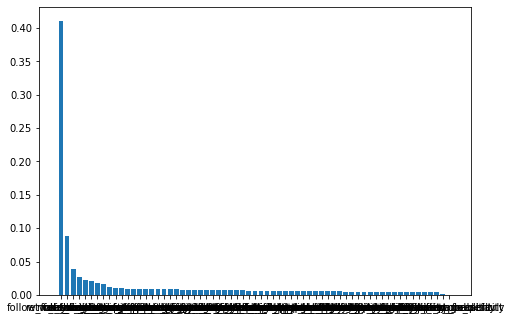

In [ ]:
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
fea = df['Stats'].tolist()
fii = df['FI'].tolist()
ax.bar(fea,fii)
plt.show()

In [ ]:
import joblib
joblib.dump(bm, 'model_file_name.pkl')

['model_file_name.pkl']

In [ ]:
cmmm= joblib.load("model_file_name.pkl")
grid_predictions =cmmm.predict(X_test) 
# print classification report 
# print(grid_predictions)
gd = [round(x) for x in grid_predictions]
# print(gd)
print(classification_report(y_test, gd)) 
print(confusion_matrix(y_test, gd)) 
print("Accuracy : ", accuracy_score(y_test,gd)*100)

              precision    recall  f1-score   support

         0.0       0.90      0.87      0.88       139
         1.0       0.77      0.81      0.79        75

    accuracy                           0.85       214
   macro avg       0.83      0.84      0.84       214
weighted avg       0.85      0.85      0.85       214

[[121  18]
 [ 14  61]]
Accuracy :  85.04672897196261
